# **Linear Regression**

> `Linear Regression` is a supervised machine learning algorithm where the predicted (analysis) output is `continuous` and has a `constant slope`. It's used to predict values within a `continuous range`, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). 
- It is a type of regression analysis where the relationship between the independent variable(s) and the dependent variable is modeled using a linear function.

`In simple terms, linear regression finds the best line that fits the data points. This line is used to predict the output for new inputs.`

There are two main types:

- **Simple regression:** only one independent variable (e.g. sales)
> This involves a single independent variable and a single dependent variable. The relationship between the two variables is represented by a straight line. 
- For example, predicting a person's weight based on their height.

- **Multiple regression** - more than one independent variables (e.g. sales, price)
> This involves multiple independent variables and a single dependent variable. The relationship is represented by a hyperplane in multidimensional space. 
- For example, predicting a person's weight based on their height, age, and diet.

**Example:**
A layman example of linear regression could be predicting the price of a house based on its size. If you have data on house prices and their sizes, you could use linear regression to find the best fit line that represents the relationship between size and price. This line can then be used to predict the price of a house given its size. The basic assumption here is that as the size of the house increases, the price would also increase, which is a linear relationship.

## **1. Simple Linear Regression:**

Simple linear regression is an approach for predicting a `response` using a single feature. It is assumed that the two variables are `linearly related`. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

1. One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
2. The other variable, denoted y, is regarded as the response, outcome, or dependent variable.

Simple linear regression gets its adjective "simple," because it concerns the study of `only two variables`. In this type of regression, we aim to find a linear relationship between x and y that can be represented by the equation:

`y = b0 + b1*x + e`

where:
- `y` is the dependent variable we want to predict.
- `b0` is the y-intercept.
- `b1` is the coefficient of the independent variable `x`. It represents the change in `y` for each one-unit change in `x`.
- `e` is the error term.

**For example**, you could use simple linear regression to understand whether `exam performance` can be predicted based on `time spent revising`; here exam performance is the dependent variable and time spent revising is the independent variable.

**Key Perfomance Metrics:**

- `MSE (Mean Squared Error)`: This is the average of the squared differences between the predicted and actual values. It's a popular metric for regression problems, but it can be hard to interpret because its value is squared.

- `R2 (R-squared)`: This is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It provides a measure of how well the regression predictions approximate the real data points. An `R2 of 1` indicates that the regression predictions `perfectly fit the data`.

- `RMSE (Root Mean Squared Error)`: This is the square root of the mean squared error. It's more interpretable than MSE because its units are the same as the original target.

**Assumptions for Simple Linear Regression:**
- Linearity of residuals 
- Independence of residuals 
- Normal distribution of residuals / random errors


#### **1. Import Libraries:**

In [58]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#### **2. Load the Dataset:**

In [59]:
# load the tips data from seaborn
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### **3. Visualize the Data:**

<Axes: xlabel='total_bill', ylabel='tip'>

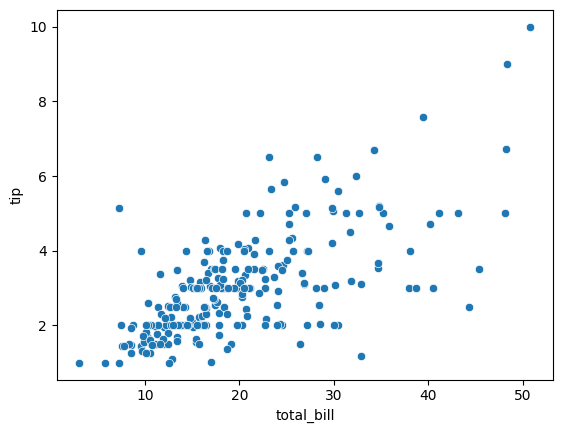

In [60]:
# visualize the total_bill and tip relationship
sns.scatterplot(x='total_bill', y='tip', data=df)

#### **4. Split the Data into X (feature) and y (target/label):**

In [61]:
# split the data into features (X) and target(y)
X = df[['total_bill']]  # X musts be a 2D array
y = df['tip']

In [62]:
# split the data into X and y
X = df[['total_bill']]
# scalar = StandardScaler()
# X = scalar.fit_transform(X)
y = df['tip']

#### **5. Split the Data into 'Training data' and 'Testing data':**

In [63]:
# Split the data into training and testing:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # 80% training and 20% testing

#### **6. Build the Model:**

#### **6.1 Call/Create the Linear Regression Model:**

In [64]:
# Create a linear regression model
model = LinearRegression()

#### **6.2 Train the Linear Regression Model:**

In [65]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

#### **6.3 Make a Linear Equation:**
(by finding out the model intercept and the slope)

In [66]:
# Model Intercept 
print(model.intercept_)
# Model Coefficients
print(model.coef_)
# Model Equation 
print('y = ', model.intercept_, '+', model.coef_, '* X')

0.7679327682823445
[0.11752837]
y =  0.7679327682823445 + [0.11752837] * X


`y =  0.9835442002534032 + [0.10019537] * X` = Exact Model working behind to predict the values

#### **7. Predict the Model:**

In [67]:
# predict the test data
y_pred = model.predict(X_test)

#### **7.1 Check for Prediction:**

In [68]:
model.predict([[5]]) 

c:\Users\Hp\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.35557464])

- for a total bill of `5`, the model predicts a tip of `1.48452106`

#### **8. Evaluate the Model:**

In [69]:
# Evaluate the Model
print('MSE (Mean Squared Error):', mean_squared_error(y_test, y_pred))
print('R^2 (Coefficient of Determinant):', r2_score(y_test, y_pred))
print('RMSE (Root Mean Squared Error) = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Mean Squared Error): 1.4157886323526434
R^2 (Coefficient of Determinant): -0.2672364325102936
RMSE (Root Mean Squared Error) =  1.1898691660651786


In [70]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  1.4157886323526434
R2 =  -0.2672364325102936
RMSE =  1.1898691660651786


**Observations from the Output:**

- `MSE (Mean Squared Error) = 1.3617`: This is the average of the squared differences between the actual and predicted values. A lower MSE means a better fit to the data. In this case, on average, the model's predictions are approximately 1.3617 units (squared) away from the actual values.

- `R2 (R-squared) = 0.4230`: This is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R2 score of 1 means the model perfectly predicts the target variable, while a score of 0 means the model does not predict the target variable at all. In this case, your model explains about `42.3%` of the variance in the target variable, which suggests that there is still a significant amount of variance not explained by the model.

- `RMSE (Root Mean Squared Error) = 1.1669`: This is the square root of the mean squared error. It's more interpretable than MSE because its units are the same as the original target. In this case, on average, the model's predictions are approximately 1.1669 units away from the actual values.

> In summary, these metrics suggest that while the model has some predictive power (as indicated by the R2 score), there is still a `significant amount of error in the predictions` (as indicated by the MSE and RMSE). You might want to consider improving the model by adding more features, tuning hyperparameters, or trying a different type of model.

#### **8.1 Plot the Model:**

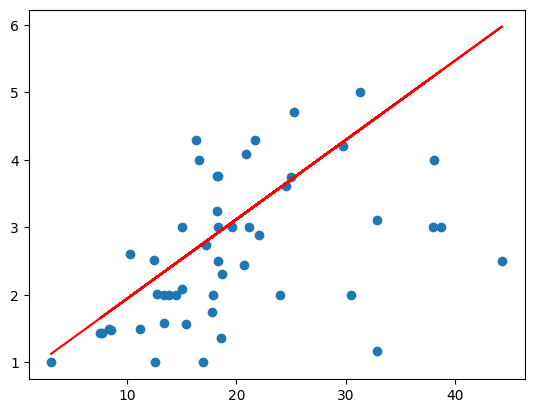

In [71]:
# Plot the Model and the data:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

## **2. Multi Linear Regression:**
> Multi Linear Regression, also known as Multiple Linear Regression, is a type of linear regression where `multiple independent variables` are used to predict a dependent variable. 

In simple linear regression, we have one independent variable predicting the dependent variable. But in many real-world scenarios, the outcome is often influenced by more than one variable. That's where Multiple Linear Regression comes in.

**For example**, predicting a `house's price(y)` could depend on its `size (X1)`, `location (X2)`, `age (X3)`, `number of rooms (X4)`, etc. In this case, we would use Multiple Linear Regression.

The **general equation** for Multiple Linear Regression is:

`y = b0 + b1*X1 + b2*X2 + ... + bn*Xn + e`

where:
- `y` is the dependent variable we want to predict.
- `b0` is the y-intercept.
- `b1, b2, ..., bn` are the coefficients of the independent variables `X1, X2, ..., Xn`.
- `e` is the error term.

Each coefficient represents the change in the dependent variable for each one-unit change in the corresponding independent variable, assuming all other variables are held constant.

In [80]:
# Step 1: Import necessary libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the 'tips' dataset from seaborn
df = sns.load_dataset('tips')

# Step 3: Select 'total_bill' and 'size' as features (X) and 'tip' as target (y)
X = df[['total_bill', 'size']]
y = df['tip']

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Predict the tip for a total bill of $20 and a party size of 3
predicted_tip = model.predict([[20, 3]])

print('Predicted tip:', predicted_tip[0])

# Step 7: Evaluate the model
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Predicted tip: 3.1808130797982797
MSE: 0.6485996190543517
R2 Score: 0.4811084097989491


c:\Users\Hp\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The output shows both the performance of multiple linear regression model on the test set and a specific prediction made by the model. Here's what each value means:

- **Predicted tip = 3.1808**: This is the tip amount predicted by the model for a total bill of $20 and a party size of 3. According to the model, a party of 3 that has a total bill of $20 would leave a tip of approximately $3.18.

- **MSE (Mean Squared Error) = 0.6486**: This is the average of the squared differences between the actual and predicted values. A lower MSE means a better fit to the data. In this case, on average, the model's predictions are approximately 0.6486 units (squared) away from the actual values.

- **R2 (R-squared) = 0.4811**: This is the proportion of the variance in the dependent variable that is predictable from the independent variables. An` R2 score of 1 means the model perfectly predicts` the target variable, while a score of 0 means the model does not predict the target variable at all. In this case, your model explains about 48.11% of the variance in the target variable, which suggests that there is still a significant amount of variance not explained by the model.

> In summary, these metrics suggest that while the model has some predictive power (as indicated by the R2 score), there is still a significant amount of error in the predictions (as indicated by the MSE). The specific prediction made by the model seems reasonable, but without knowing the actual tip amount in this case, it's hard to say how accurate it is. 

**Suggestions:** You might want to consider improving the model by adding more features, tuning hyperparameters, or trying a different type of model.